In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize
life_expectancy = pd.read_csv("/Users/uttamsgowda/Downloads/Projects/Life-Expectency-Python/dataset.csv") #reading the file
life_expectancy.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/uttamsgowda/Downloads/Projects/Life-Expectency-Python/dataset.csv'

In [2]:
life_expectancy.describe()

NameError: name 'life_expectancy' is not defined

In [3]:
life_expectancy.columns

NameError: name 'life_expectancy' is not defined

In [5]:
life_expectancy.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [6]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   Infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_five_deaths                2938 non-null   int64  
 12  Polio               

In [7]:
print(life_expectancy.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [8]:
life_expectancy.reset_index(inplace=True)
life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
imputed_data = []
for year in list(life_expectancy.Year.unique()):
    year_data = life_expectancy[life_expectancy.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
life_expectancy = pd.concat(imputed_data).copy()

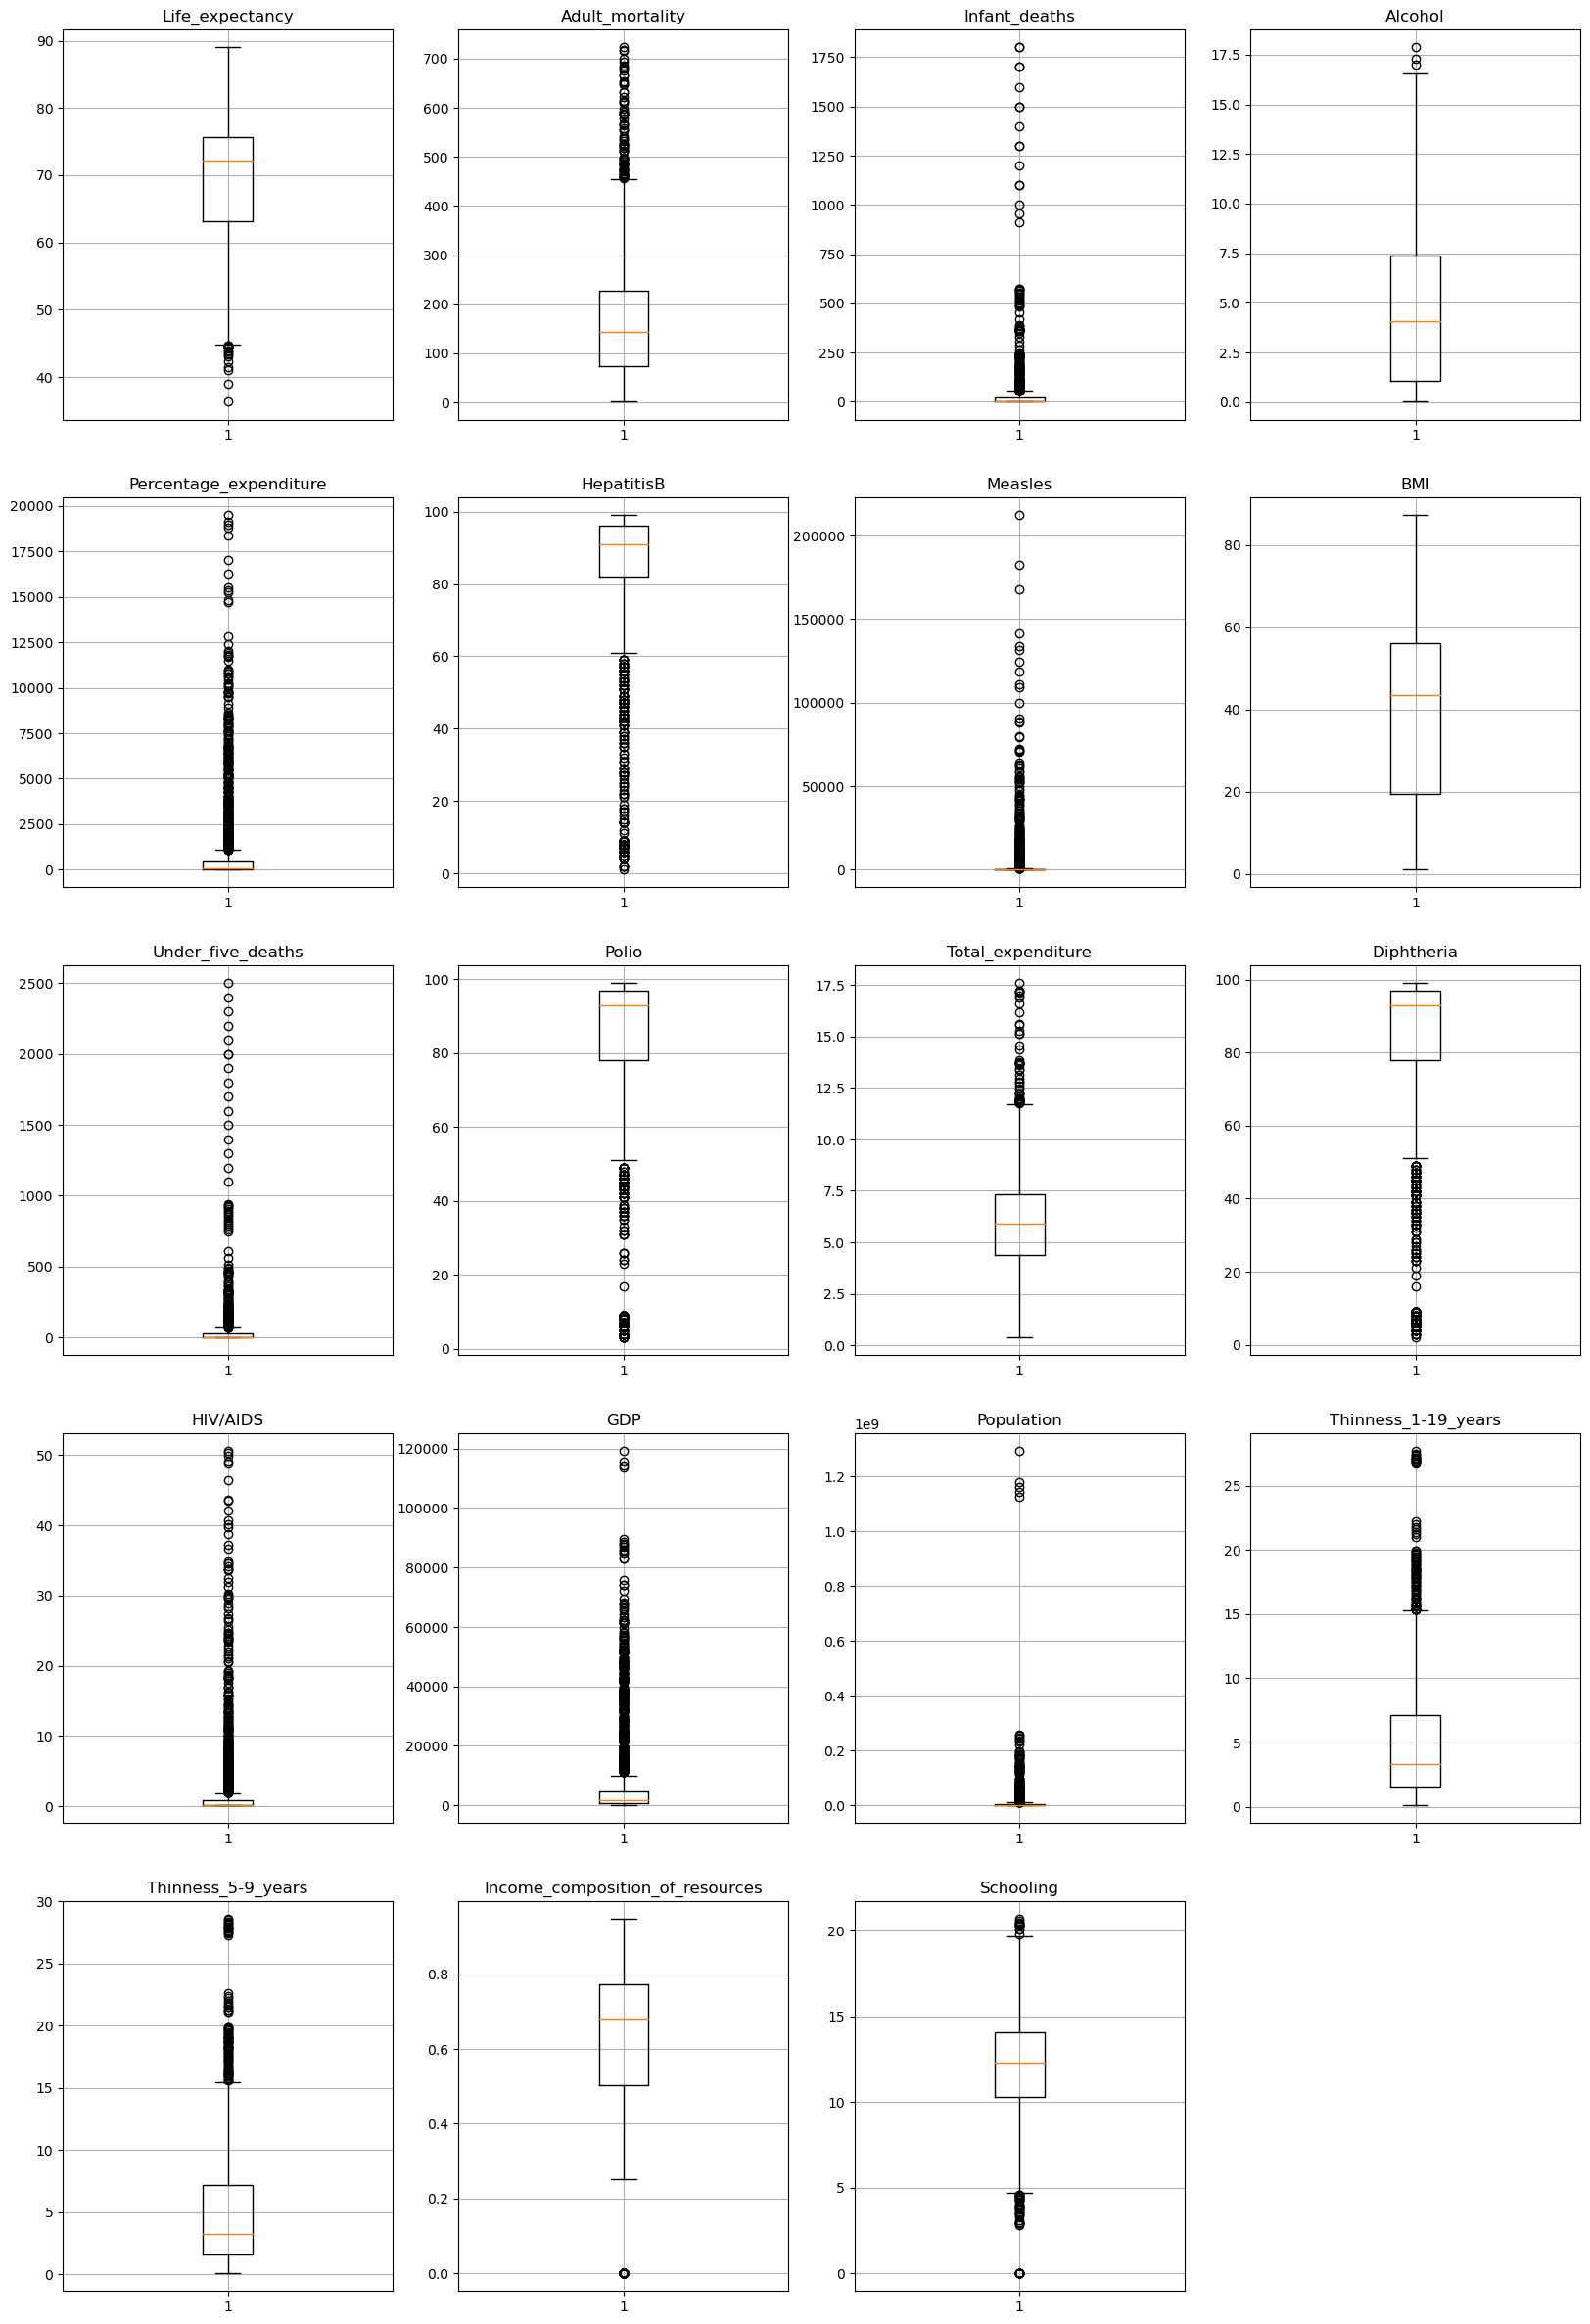

In [9]:
col_dict = {'Life_expectancy':1,'Adult_mortality':2,'Infant_deaths':3,'Alcohol':4,'Percentage_expenditure':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_five_deaths':9,'Polio':10,'Total_expenditure':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'Thinness_1-19_years':16,'Thinness_5-9_years':17,'Income_composition_of_resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_expectancy[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


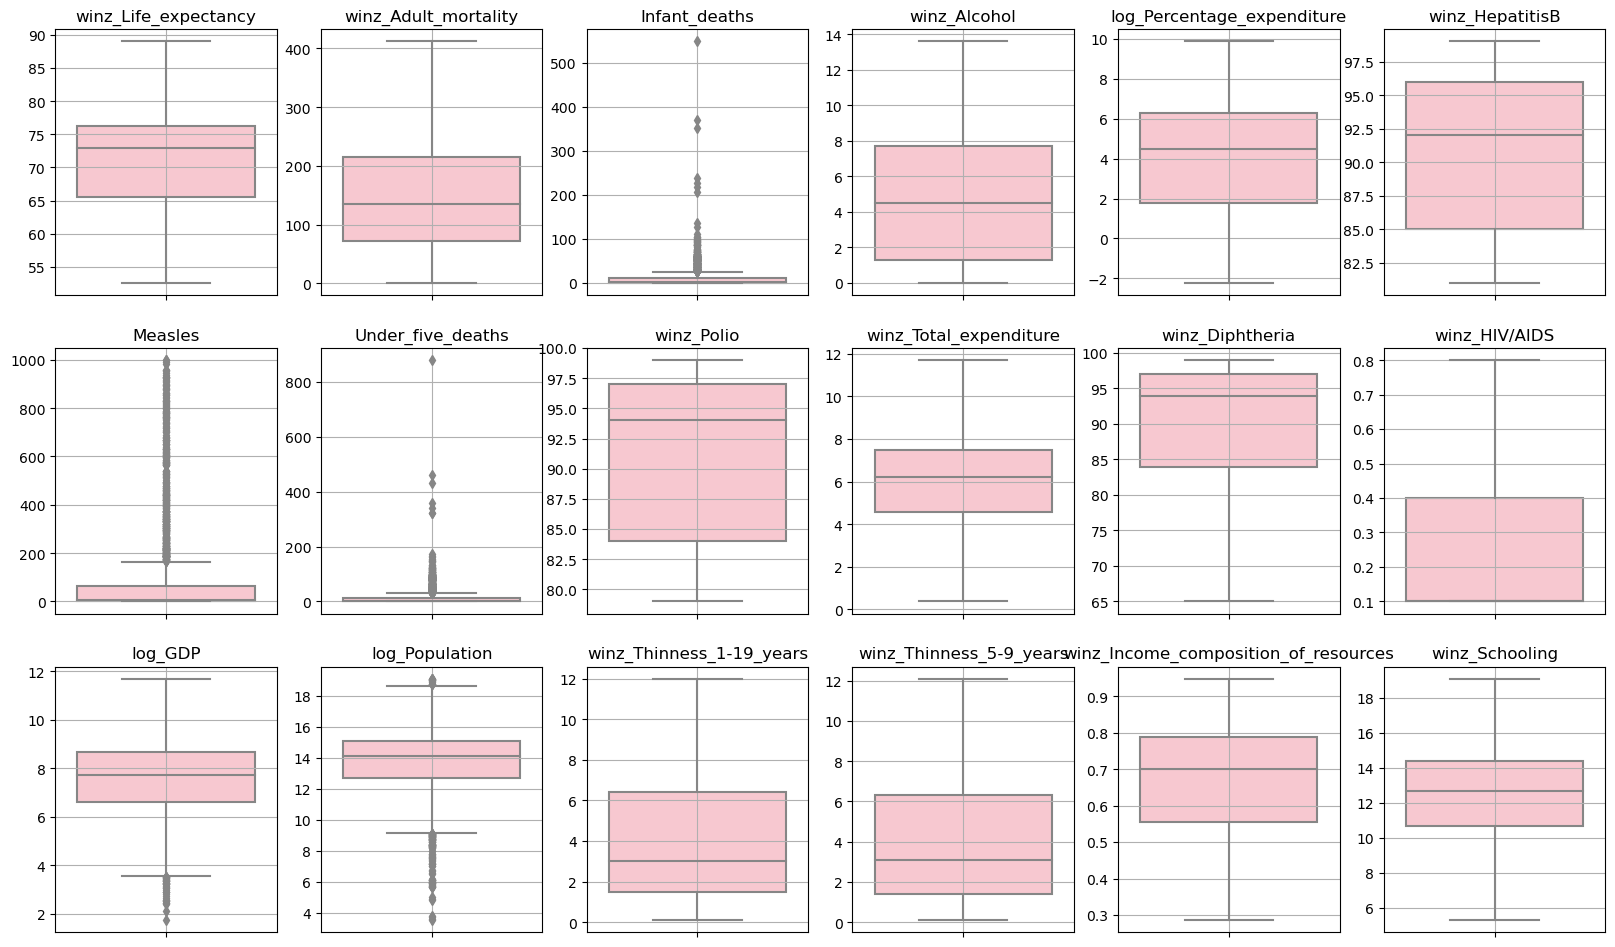

In [10]:
life_expectancy = life_expectancy[life_expectancy['Infant_deaths'] < 1001]
life_expectancy = life_expectancy[life_expectancy['Measles'] < 1001]
life_expectancy = life_expectancy[life_expectancy['Under_five_deaths'] < 1001]

life_expectancy.drop(['BMI'], axis=1, inplace=True)
life_expectancy['log_Percentage_expenditure'] = np.log(life_expectancy['Percentage_expenditure'])
life_expectancy['log_Population'] = np.log(life_expectancy['Population'])
life_expectancy['log_GDP'] = np.log(life_expectancy['GDP'])
life_expectancy = life_expectancy.replace([np.inf, -np.inf], 0)
life_expectancy['log_Percentage_expenditure']

life_expectancy['winz_Life_expectancy'] = winsorize(life_expectancy['Life_expectancy'], (0.05,0))
life_expectancy['winz_Adult_mortality'] = winsorize(life_expectancy['Adult_mortality'], (0,0.04))
life_expectancy['winz_Alcohol'] = winsorize(life_expectancy['Alcohol'], (0.0,0.01))
life_expectancy['winz_HepatitisB'] = winsorize(life_expectancy['HepatitisB'], (0.20,0.0))
life_expectancy['winz_Polio'] = winsorize(life_expectancy['Polio'], (0.20,0.0))
life_expectancy['winz_Total_expenditure'] = winsorize(life_expectancy['Total_expenditure'], (0.0,0.02))
life_expectancy['winz_Diphtheria'] = winsorize(life_expectancy['Diphtheria'], (0.11,0.0))
life_expectancy['winz_HIV/AIDS'] = winsorize(life_expectancy['HIV/AIDS'], (0.0,0.21))
life_expectancy['winz_Thinness_1-19_years'] = winsorize(life_expectancy['Thinness_1-19_years'], (0.0,0.04))
life_expectancy['winz_Thinness_5-9_years'] = winsorize(life_expectancy['Thinness_5-9_years'], (0.0,0.04))
life_expectancy['winz_Income_composition_of_resources'] = winsorize(life_expectancy['Income_composition_of_resources'], (0.05,0.0))
life_expectancy['winz_Schooling'] = winsorize(life_expectancy['Schooling'], (0.03,0.01))

col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'Infant_deaths':3,'winz_Alcohol':4,
            'log_Percentage_expenditure':5,'winz_HepatitisB':6,'Measles':7,'Under_five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_GDP':13,'log_Population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}


fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = life_expectancy[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

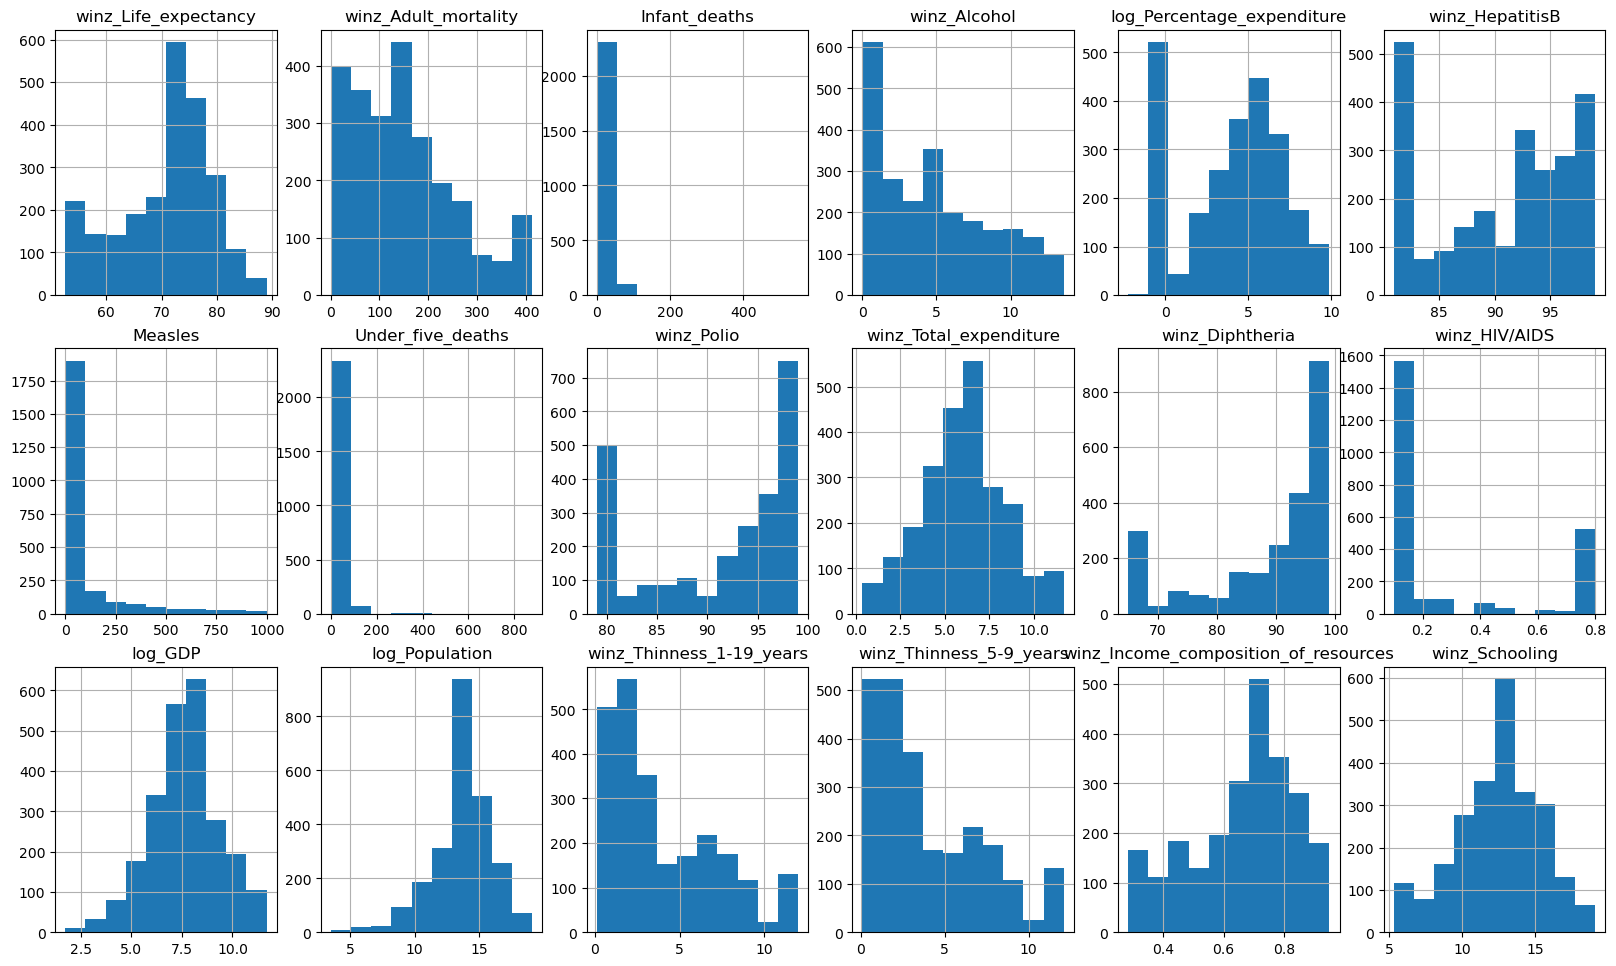

In [11]:
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     plt.hist(life_expectancy[variable])
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

<AxesSubplot:>

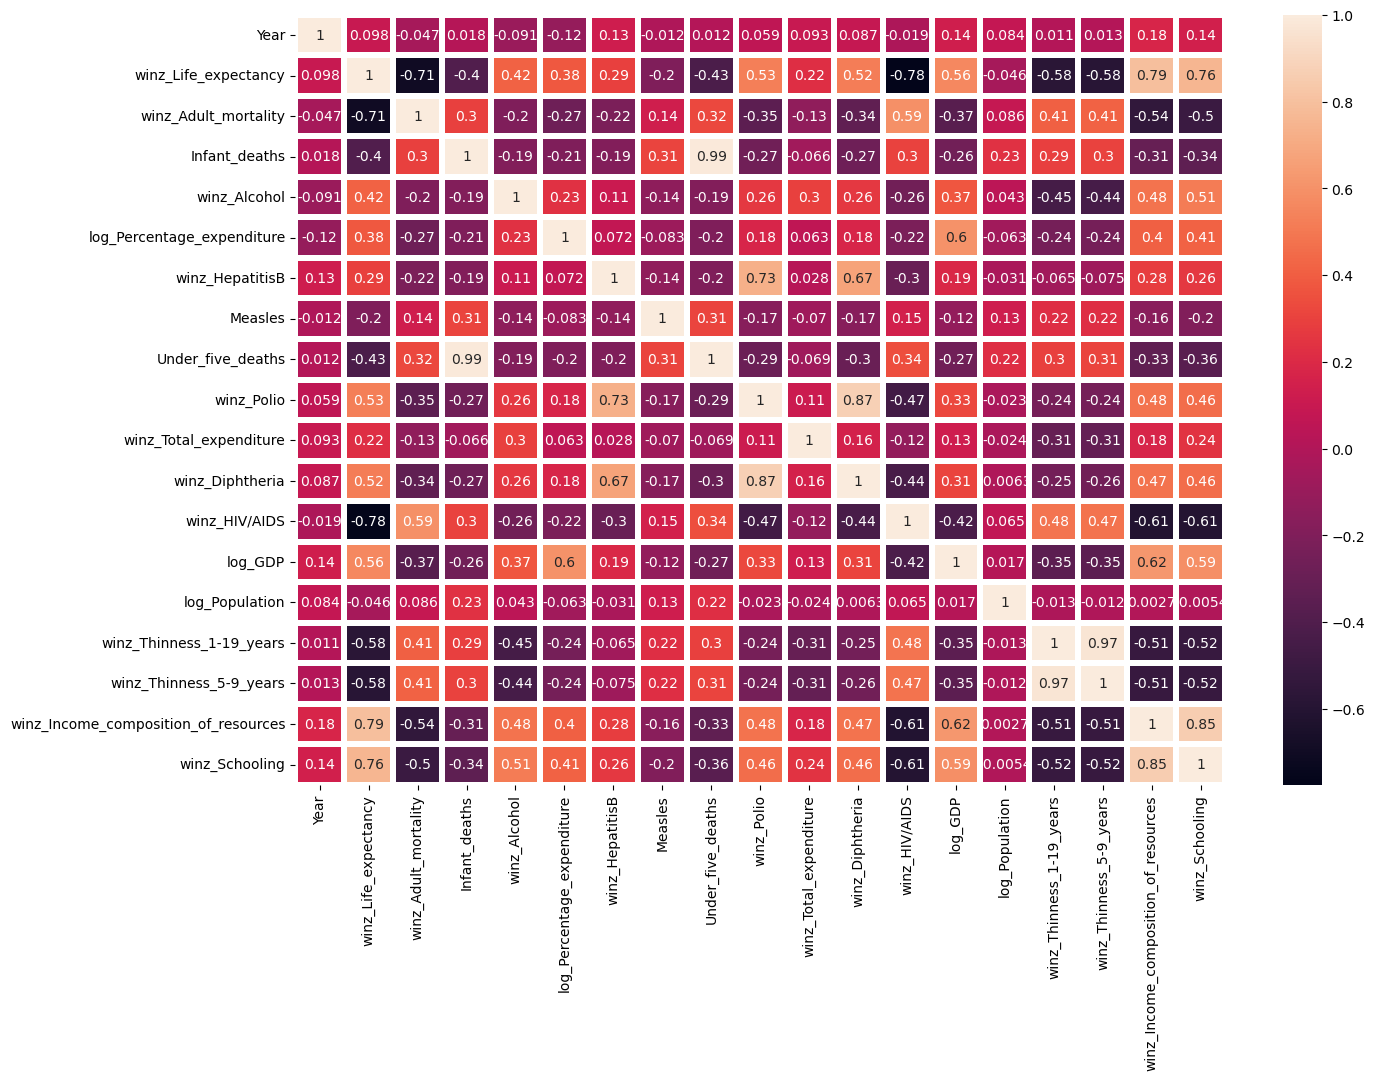

In [12]:
life_exp = life_expectancy[['Year', 'Country', 'Status','winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_HepatitisB','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']]
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

In [2]:
life_expec.corr()['Life expectancy '].nlargest(15)


NameError: name 'life_expec' is not defined

In [13]:
status_life_exp = life_expectancy.groupby(by=['Status']).mean().reset_index().sort_values('winz_Life_expectancy',ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,10))

fig = px.bar(status_life_exp, x='Status', y='winz_Life_expectancy',color='winz_Life_expectancy')

fig.update_layout(
        title="Life expectancy according to status",
        xaxis_title="Status",
        yaxis_title="Average Life Expectancy",
        font=dict(
            family="Courier New",
            size=16,
            color="black"
        )
    )
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [14]:
life_year = life_expectancy.groupby(by = ['Year', 'Status']).mean().reset_index()
Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]
fig1 = go.Figure()
for template in ["plotly_dark"]:
    fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['winz_Life_expectancy'],
                    mode='lines',
                    name='Developing',
                    marker_color='#f075c2'))
    fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['winz_Life_expectancy'],
                    mode='lines',
                    name='Developed',
                    marker_color='#28d2c2'))
    fig1.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life expectancy in age',
    title_text='Average Life expectancy of Developing and Developed countries over the years',
    template=template)
fig1.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [12]:
df = pd.read_csv('/Users/uttamsgowda/Downloads/Projects/Life-Expectency-Python/dataset.csv')

In [13]:
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
df['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [16]:
df.drop(columns = ['Year', 'Status', 'Country'], inplace = True)

In [17]:
df

Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0                 65.0            263.0             62     0.01   
1                 59.9            271.0             64     0.01   
2                 59.9            268.0             66     0.01   
3                 59.5            272.0             69     0.01   
4                 59.2            275.0             71     0.01   
...                ...              ...            ...      ...   
2933              44.3            723.0             27     4.36   
2934              44.5            715.0             26     4.06   
2935              44.8             73.0             25     4.43   
2936              45.3            686.0             25     1.72   
2937              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                     83    6.0               8.16         65.0        0.1   
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

In [18]:
df.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<AxesSubplot:xlabel='Adult Mortality', ylabel='Alcohol'>

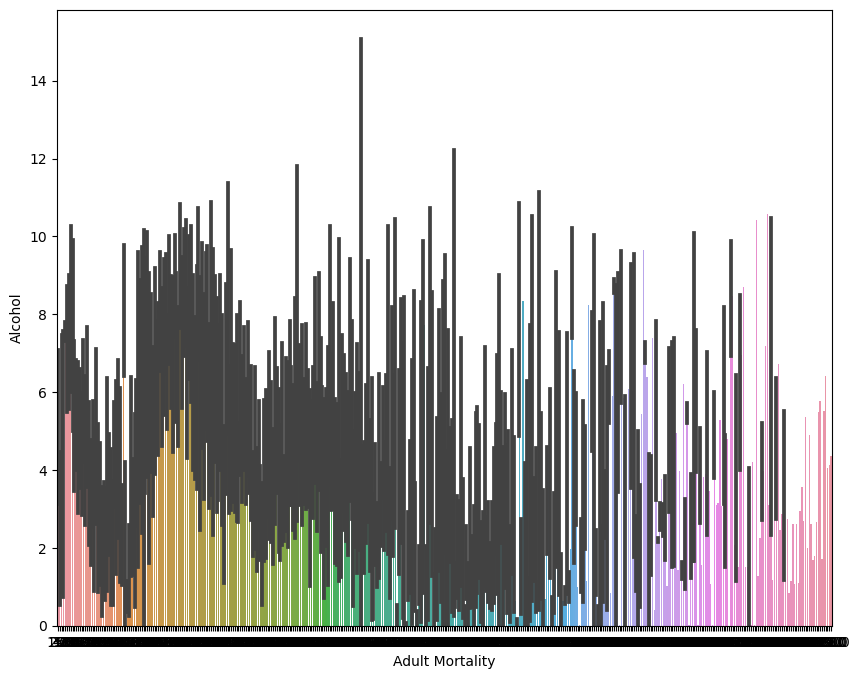

In [19]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Adult Mortality',y = 'Alcohol', data = df)

<AxesSubplot:xlabel='Alcohol'>

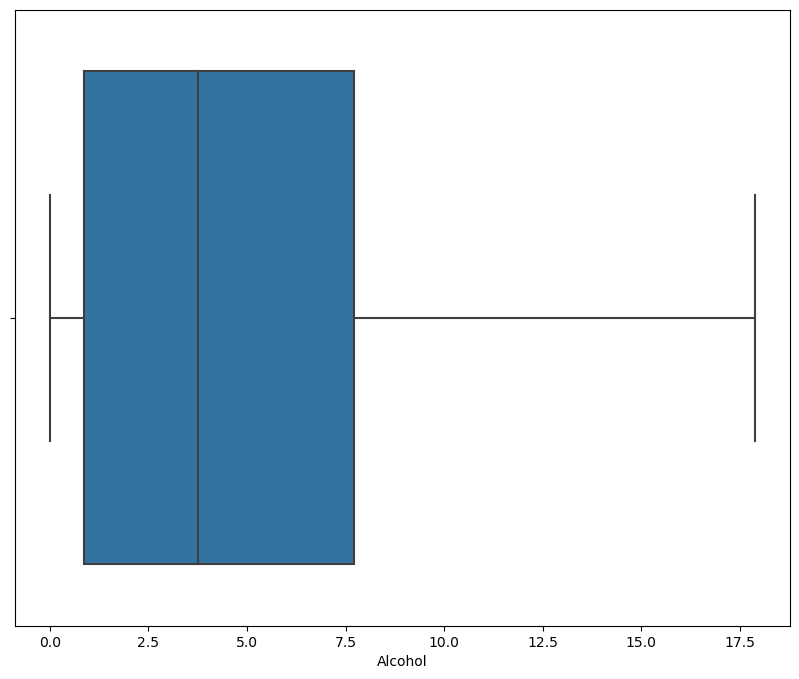

In [20]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Alcohol', data = df)

In [21]:
y= df["Life expectancy "]
X=  df.drop(["Life expectancy "], axis=1)

In [22]:
y.fillna(y.median(), inplace=True)
X.fillna(X.mean(), inplace=True)

In [23]:
sc = StandardScaler()

In [24]:
X = sc.fit_transform(X)

In [25]:
X

array([[ 0.79158632,  0.26882378, -1.1729584 , ...,  2.77327898,
        -0.72540055, -0.57993072],
       [ 0.85607167,  0.28578638, -1.1729584 , ...,  2.81790246,
        -0.74005007, -0.61056961],
       [ 0.83188966,  0.30274898, -1.1729584 , ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [-0.73994077, -0.04498439, -0.04414645, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [ 4.20124926, -0.04498439, -0.73624609, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [ 4.03197521, -0.05346569, -0.74646158, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
lg = LogisticRegression()
svr = SVR()
RF = RandomForestRegressor()
GB = GradientBoostingRegressor()
DT = DecisionTreeRegressor()

In [28]:
svr.fit(X_train, y_train)
RF.fit(X_train, y_train)
GB.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred_svr = svr.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_GB = GB.predict(X_test)
y_pred_DT = DT.predict(X_test)

In [30]:
train_accuracy_svr = svr.score(X_train, y_train)
test_accuracy_svr = svr.score(X_test, y_test)
print('train_accuracy_RF', train_accuracy_svr)
print('test_accuracy_RF', test_accuracy_svr)

train_accuracy_RF 0.8672138697648071
test_accuracy_RF 0.8741068502028093


In [31]:
train_accuracy_RF = RF.score(X_train, y_train)
test_accuracy_RF = RF.score(X_test, y_test)
print('train_accuracy_RF', train_accuracy_RF)
print('test_accuracy_RF', test_accuracy_RF)

train_accuracy_RF 0.9942380365453902
test_accuracy_RF 0.9678003946541596


In [32]:
train_accuracy_GB = GB.score(X_train, y_train)
test_accuracy_GB = GB.score(X_test, y_test)
print('train_accuracy_GB', train_accuracy_GB)
print('test_accuracy_GB', test_accuracy_GB)

train_accuracy_GB 0.960274138117625
test_accuracy_GB 0.9498965549259488


In [33]:
train_accuracy_DT = DT.score(X_train, y_train)
test_accuracy_DT = DT.score(X_test, y_test)
print('train_accuracy_DT', train_accuracy_DT)
print('test_accuracy_DT', test_accuracy_DT)

train_accuracy_DT 1.0
test_accuracy_DT 0.9231642771597856


In [34]:
#Here Random forest got high scoring with training and testing 

In [35]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
MAE = mean_absolute_error(y_test, y_pred_RF)
MSE = mean_squared_error(y_test, y_pred_RF)

In [36]:
print('mean_absolute_error:', MAE)
print('mean_squared_error:', MSE)

mean_absolute_error: 1.0862959183673466
mean_squared_error: 2.790654959183671


In [37]:
new_data = X
prediction = RF.predict(new_data)

In [38]:
prediction

array([64.46 , 59.791, 59.789, ..., 45.897, 45.256, 44.988])